In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import json
import csv
from requests import post
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
steam_data =pd.read_csv(r"C:\Users\valdi\OneDrive\Documents\Springboard\steam.csv")
merged_steamdata=pd.read_csv(r"merged_steamdata.csv", delimiter= ',')

In [5]:
numerical_df= steam_data[['positive_ratings','negative_ratings']]
numerical_df= numerical_df.dropna()

In [18]:
df= steam_data['genres'].str.split(';', expand= True)

In [19]:
df2= merged_steamdata['categories'].str.split(';', expand= True)
df_two=pd.get_dummies(df, prefix= " ", prefix_sep= " ")
df_two= df_two.sum()
print(df_two)

  Accounting                  2
  Action                  11212
  Adventure                5256
  Animation & Modeling       66
  Audio Production           16
                          ...  
  Utilities                   1
  Web Publishing              1
  Video Production            1
  Web Publishing              1
  Game Development            1
Length: 195, dtype: int64


In [27]:
# from most to least popular categorey 
df_two=df_two.sort_values(ascending= False).head(10)
pd.DataFrame(df_two,columns=['Count'])

,Count
Action,11212
Indie,8691
Indie,6141
Adventure,5256
Casual,4373
Adventure,4342
Casual,4321
Indie,2623
Strategy,1665
Indie,1633


In [21]:
filtered_df2=  df_two[df_two>1000]
filtered_df2.head()
filtered_df2.shape

(10,)

In [25]:
df_one=pd.get_dummies(df, prefix= " ", prefix_sep= " ")
df_one=df_one.sum()
filtered_df1= df_one[df_one> 1000]
print(filtered_df1)

  Action        11212
  Adventure      5256
  Casual         4373
  Indie          2623
  Adventure      4342
  Casual         4321
  Indie          8691
  Simulation     1230
  Casual         1376
  Indie          6141
  RPG            1408
  Simulation     1620
  Strategy       1665
  Indie          1633
  RPG            1163
  Strategy       1104
dtype: int64


In [28]:
data= [['Action',11212],['Adventure', 5256],['Strategy', 1665]]
top3_cate=pd.DataFrame(data, columns =['Category', 'Count'])

In [10]:
scaler = StandardScaler()
numerical_scaled=scaler.fit_transform(numerical_df)
numerical_scaled= pd.DataFrame(numerical_scaled)
print(numerical_scaled)

              0         1
0      6.505741  0.730006
1      0.122045  0.098480
2      0.127206  0.043636
3      0.014348  0.013063
4      0.223792  0.017964
...         ...       ...
27070 -0.052535 -0.049249
27071 -0.052272 -0.049016
27072 -0.052693 -0.049016
27073 -0.052588 -0.049249
27074 -0.052483 -0.049249

[27075 rows x 2 columns]


In [11]:
numerical_scaled=numerical_scaled.rename(index=str, columns= {0:'positive_ratings',1:'negative_ratings'})
print(numerical_scaled)

       positive_ratings  negative_ratings
0              6.505741          0.730006
1              0.122045          0.098480
2              0.127206          0.043636
3              0.014348          0.013063
4              0.223792          0.017964
...                 ...               ...
27070         -0.052535         -0.049249
27071         -0.052272         -0.049016
27072         -0.052693         -0.049016
27073         -0.052588         -0.049249
27074         -0.052483         -0.049249

[27075 rows x 2 columns]


In [16]:
pca_2c= PCA(n_components=2)
X_pca_2c=pca_2c.fit_transform(numerical_scaled)
pca_2c.explained_variance_ratio_
#.explained_variance_ratio is used to show how much the variance is explained within the PCA

array([0.88140214, 0.11859786])

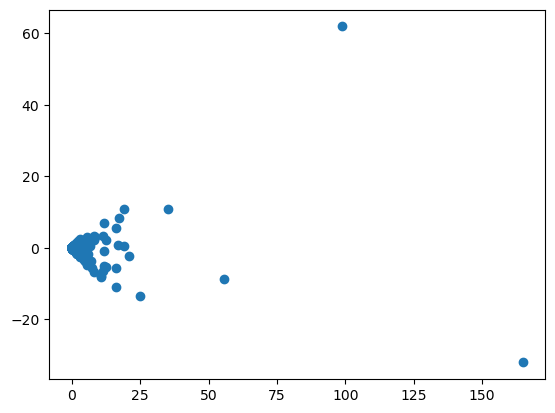

In [20]:
plt.scatter(X_pca_2c[:,0],X_pca_2c[:,1])

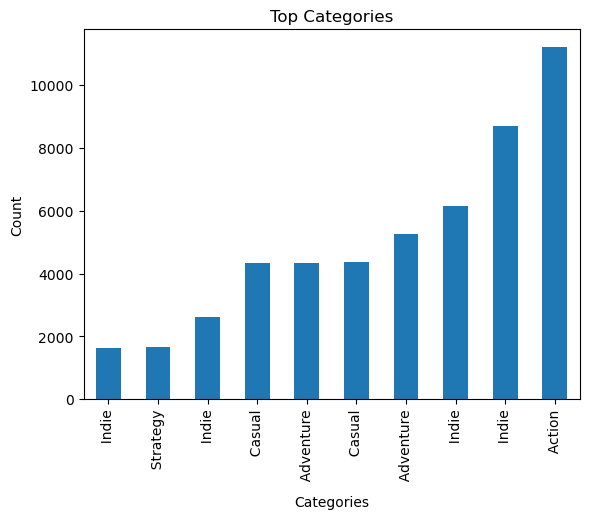

In [23]:
sorted_filtered=filtered_df2.sort_values()
graph_a=sorted_filtered.plot(kind= 'bar', title= 'Top Categories')
graph_a.set_xlabel('Categories')
graph_a.set_ylabel('Count')
plt.show()

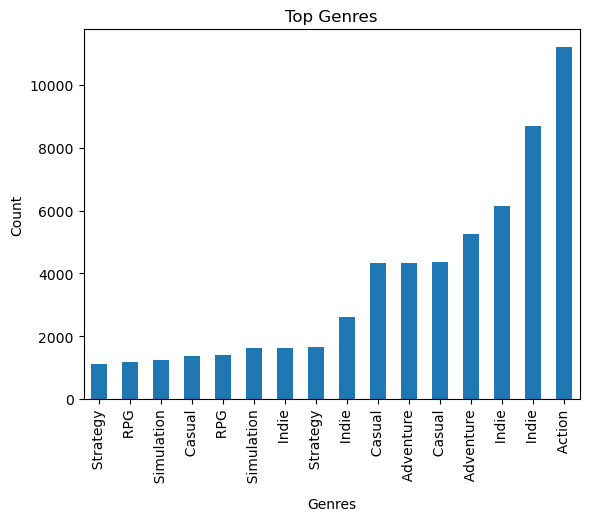

In [26]:
sorted_filtered1=filtered_df1.sort_values()
graph_b=sorted_filtered1.plot(kind='bar', title= 'Top Genres')
graph_b.set_xlabel('Genres')
graph_b.set_ylabel('Count')
plt.show()

In [101]:
print(filtered_df1.equals(filtered_df2))

True


Due to the identical disturbation among the Categories and Genres bar graphs, 
suggesting that the these two categories have the same data.
Cell 101 is designed to test that theorey and it appears that the data in these two columns indeeed do reflect having the same
data. This is indicated by the return statement of "True."


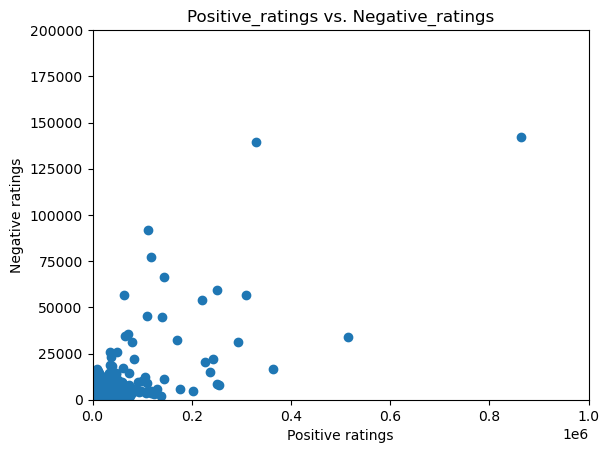

In [102]:
plt.scatter(data=merged_steamdata, x='positive_ratings', y='negative_ratings')
plt.xlim(0,1000000)
plt.ylim(0,200000)
plt.title('Positive_ratings vs. Negative_ratings')
plt.xlabel('Positive ratings')
plt.ylabel('Negative ratings')
plt.show()

This scatterplot represents the relationship between the positive ratings and negative ratings. the scatter plot suggests some king of correlation between the two different kinds of ratings

In [103]:
steam_corr= merged_steamdata[['genres','negative_ratings','positive_ratings',
'2d',
'2d_fighter',
'360_video',
'3d',
'3d_platformer',
'4_player_local',
'action',
'action_rpg',
'action_adventure',
'addictive',
'adventure',
'aliens',
'anime',
'arcade',
'arena_shooter',
'artificial_intelligence',
'assassin',
'asynchronous_multiplayer',
'base_building',
'baseball',
'basketball',
'batman',
'battle_royale',
'beat_em_up',
'blood',
'crpg',
'cartoon',
'casual',
'cats',
'character_action_game',
'character_customization',
'choices_matter',
'choose_your_own_adventure',
'cinematic',
'class_based',
'classic',
'co_op',
'co_op_campaign',
'cold_war',
'colorful',
'comedy',
'comic_book',
'competitive',
'conspiracy',
'controller',
'crime',
'cult_classic',
'cute',
'cyberpunk',
'dark',
'dark_comedy',
'dark_fantasy',
'dark_humor',
'demons',
'destruction',
'detective',
'difficult',
'dinosaurs',
'dog',
'dragons',
'drama',
'driving',
'dungeon_crawler',
'dungeons_&_dragons',
'dystopian_',
'education',
'emotional',
'epic',
'exploration',
'fmv',
'fps',
'family_friendly',
'fantasy',
'fast_paced',
'female_protagonist',
'fighting',
'first_person',
'fishing',
'flight',
'football',
'foreign',
'free_to_play',
'funny',
'futuristic',
'gambling',
'god_game',
'golf',
'gore',
'gothic',
'grand_strategy',
'great_soundtrack',
'grid_based_movement',
'hack_and_slash',
'hacking',
'heist',
'historical',
'hockey',
'horror',
'horses',
'hunting',
'indie',
'interactive_fiction',
'investigation',
'jrpg',
'lego',
'lara_croft',
'lemmings',
'level_editor',
'linear',
'local_co_op',
'local_multiplayer',
'logic',
'loot',
'lore_rich',
'mmorpg',
'moba',
'magic',
'martial_arts',
'massively_multiplayer',
'masterpiece',
'mature',
'mechs',
'medieval',
'military',
'minigames',
'minimalist',
'mining',
'mod',
'moddable',
'modern',
'motocross',
'motorbike',
'mouse_only',
'multiplayer',
'music',
'mystery',
'mystery_dungeon',
'mythology',
'nsfw',
'narration',
'naval',
'ninja',
'noir',
'nudity',
'old_school',
'online_co_op',
'open_world',
'parkour',
'parody_',
'party_based_rpg',
'physics',
'pinball',
'pirates',
'pixel_graphics',
'platformer',
'point_&_click',
'pool',
'post_apocalyptic',
'psychedelic',
'psychological',
'psychological_horror',
'puzzle',
'puzzle_platformer',
'pve',
'pvp',
'quick_time_events',
'rpg',
'rpgmaker',
'rts',
'racing',
'realistic',
'relaxing',
'remake',
'replay_value',
'retro',
'robots',
'rogue_like',
'romance',
'runner',
'sailing',
'sandbox',
'satire',
'sci_fi',
'science',
'score_attack',
'sequel',
'sexual_content',
'shoot_em_up',
'shooter',
'short',
'side_scroller',
'simulation',
'singleplayer',
'skateboarding',
'skating',
'skiing',
'sniper',
'snow',
'snowboarding',
'soccer',
'soundtrack',
'space',
'space_sim',
'spectacle_fighter',
'split_screen',
'sports',
'star_wars',
'stealth',
'steampunk',
'story_rich',
'strategy',
'strategy_rpg',
'superhero',
'supernatural',
'surreal',
'survival',
'survival_horror',
'swordplay',
'tactical',
'tactical_rpg',
'tanks',
'team_based',
'tennis',
'text_based',
'third_person',
'third_person_shooter',
'thriller',
'time_attack',
'time_manipulation',
'time_travel',
'top_down',
'top_down_shooter',
'tower_defense',
'trading_card_game',
'turn_based',
'turn_based_combat',
'turn_based_strategy',
'turn_based_tactics',
'twin_stick_shooter',
'underground',
'underwater',
'vr',
'vampire',
'villain_protagonist',
'violent',
'walking_simulator',
'war',
'wargame',
'warhammer_40k',
'werewolves',
'western',
'word_game', 
'world_war_i',
'world_war_ii',
'wrestling',
'zombies',
'e_sports']].dropna().corr()
print(steam_corr)

                  negative_ratings  positive_ratings        2d  2d_fighter  \
negative_ratings          1.000000          0.762804  0.021433    0.017192   
positive_ratings          0.762804          1.000000  0.111796    0.019508   
2d                        0.021433          0.111796  1.000000    0.084943   
2d_fighter                0.017192          0.019508  0.084943    1.000000   
360_video                -0.000573         -0.000644 -0.000986   -0.000442   
...                            ...               ...       ...         ...   
world_war_i               0.005308          0.008019  0.025301   -0.000573   
world_war_ii              0.060202          0.038388 -0.002262   -0.001086   
wrestling                 0.000548         -0.000317  0.002140   -0.000668   
zombies                   0.113279          0.133617  0.002906   -0.000907   
e_sports                  0.594705          0.873008 -0.000667    0.004407   

                  360_video        3d  3d_platformer  4_player_

The matrix above describes the correlation between each column from a range of -1 to 1. The cell below is designed to query any outstanding correlations. These outstanding correlations are the main focus of the heatmap due to the large amount of columns. 

In [137]:
corr_df = steam_corr.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
signi_corr= [c for c in tri_df.columns if any(tri_df[c] > 0.8)]
print(signi_corr)


['negative_ratings', 'positive_ratings', '2d', '2d_fighter', '4_player_local', 'action', 'action_rpg', 'action_adventure', 'addictive', 'adventure', 'aliens', 'anime', 'base_building', 'batman', 'cartoon', 'character_action_game', 'character_customization', 'choices_matter', 'class_based', 'co_op', 'comedy', 'comic_book', 'competitive', 'crime', 'cute', 'dark', 'dark_fantasy', 'detective', 'difficult', 'dragons', 'driving', 'education', 'emotional', 'epic', 'fps', 'fantasy', 'fast_paced', 'first_person', 'flight', 'football', 'funny', 'futuristic', 'gore', 'grand_strategy', 'great_soundtrack', 'horror', 'level_editor', 'local_multiplayer', 'moba', 'magic', 'mature', 'military', 'mod', 'moddable', 'motocross', 'multiplayer', 'mystery', 'narration', 'naval', 'online_co_op', 'open_world', 'pixel_graphics', 'post_apocalyptic', 'psychedelic', 'psychological_horror', 'pvp', 'rts', 'racing', 'realistic', 'sandbox', 'shooter', 'short', 'singleplayer', 'skiing', 'snow', 'soccer', 'split_screen'

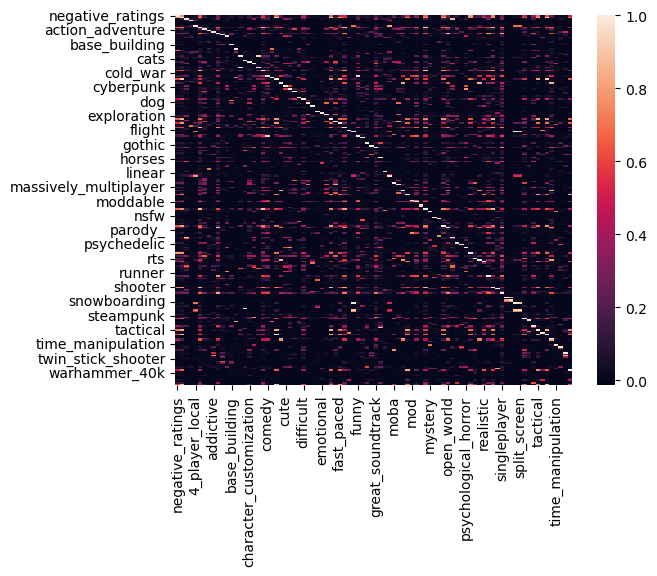

<Figure size 2e+10x1e+09 with 0 Axes>

In [138]:
signi_col=steam_corr[['negative_ratings', 'positive_ratings', '2d', '2d_fighter', '4_player_local', 'action', 'action_rpg', 'action_adventure', 'addictive', 'adventure', 'aliens', 'anime', 'base_building', 'batman', 'cartoon', 'character_action_game', 'character_customization', 'choices_matter', 'class_based', 'co_op', 'comedy', 'comic_book', 'competitive', 'crime', 'cute', 'dark', 'dark_fantasy', 'detective', 'difficult', 'dragons', 'driving', 'education', 'emotional', 'epic', 'fps', 'fantasy', 'fast_paced', 'first_person', 'flight', 'football', 'funny', 'futuristic', 'gore', 'grand_strategy', 'great_soundtrack', 'horror', 'level_editor', 'local_multiplayer', 'moba', 'magic', 'mature', 'military', 'mod', 'moddable', 'motocross', 'multiplayer', 'mystery', 'narration', 'naval', 'online_co_op', 'open_world', 'pixel_graphics', 'post_apocalyptic', 'psychedelic', 'psychological_horror', 'pvp', 'rts', 'racing', 'realistic', 'sandbox', 'shooter', 'short', 'singleplayer', 'skiing', 'snow', 'soccer', 'split_screen', 'strategy', 'strategy_rpg', 'survival', 'tactical', 'tanks', 'team_based', 'third_person', 'time_manipulation', 'top_down', 'turn_based', 'war']]
sns.heatmap(signi_col)
plt.figure(figsize=(200000000,10000000))
plt.show()

To summarize the purpose of this notebook is to start the early steps of creating a Machine Learning program designed to not only identify top trending games and generes but as well as future trends. The first step is collecting data from a reputaible source, as stated in the proposal this data orignates from steam. Once this step is performed, the data was grossly-analyzed. Just understanding, the type of data how many columns and rows, if there any missing or strange values, basic statistics, and/or how the data was recorded(binary or etc). The "genere" aspect of the data was converted to a binary system in order to make the data easier to manipulate. I have also added a new dataframe that consist of data that describes the amount of upvotes each genre of game which that table has been merged with the steam_data dataframe. In the next journal, this data will be used to create a histogram. The histogram will visualize least and most popular generes.